# Target Audience for Direct Marketing in Starbucks Rewards Mobile App

This is part 2 of Starbucks capstone project. In this part, I perform exploratory data analysis (EDA).

See `1_Starbucks_cleaning.ipynb` and `3_Starbucks_modeling.ipynb` for more information on other steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
customers = pd.read_csv('data/starbucks_customer_level.csv', sep=';', parse_dates=['became_member_on'])
offers = pd.read_csv('data/starbucks_offer_level.csv', sep=';')
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format="%Y/%m/%d")

## Customer's Profile

In [3]:
customers.head()

,gender,age,person,became_member_on,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,...,avg_reward_size,avg_bogo_size,avg_discount_size,offers_rr,offers_cvr,bogo_rr,bogo_cvr,discount_rr,discount_cvr,informational_rr
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-01-01,NaN,20.40,5.0,9,5.0,5.0,...,2.5,0.0,2.5,100.0,40.0,0.0,0.00,100.00,40.0,0.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-01-01,112000.0,77.01,0.0,3,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-01-01,NaN,14.30,0.0,6,2.0,1.0,...,0.0,0.0,0.0,50.0,0.0,100.0,0.00,0.00,0.0,0.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-01-01,100000.0,159.27,15.0,7,4.0,4.0,...,7.5,7.5,0.0,100.0,50.0,100.0,66.67,0.00,0.0,100.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-01-01,NaN,4.65,0.0,3,5.0,3.0,...,0.0,0.0,0.0,60.0,0.0,0.0,0.00,66.67,0.0,50.0


Let's see distributions of age, gender and income. Note: NaNs values here are not included.

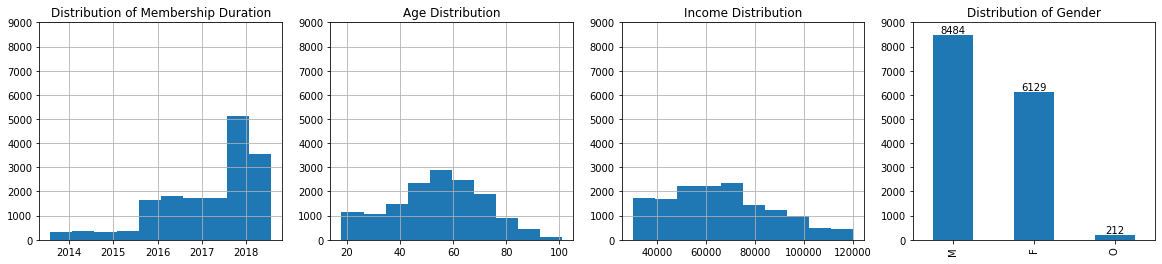

In [4]:
plt.subplots(figsize=(20, 4));

plt.subplot(1,4,1)
profile.became_member_on.hist();
plt.title("Distribution of Membership Duration");
plt.ylim(0, 9000);

plt.subplot(1,4,2)
plt.title("Age Distribution")
customers.age.hist();
plt.ylim(0, 9000);

plt.subplot(1,4,3)
plt.title("Income Distribution")
customers.income.hist();
plt.ylim(0, 9000);

plt.subplot(1,4,4)
plt.title("Distribution of Gender")
customers.gender.value_counts().plot.bar();
for i, gender_num in enumerate(customers.gender.value_counts()):
    #X position just after the end of the bar:
    plt.text(i, gender_num, gender_num, ha = 'center', va='bottom');
plt.ylim(0, 9000);

In [5]:
print(f"earliest member since: {customers.became_member_on.min()}, latest member since: {customers.became_member_on.max()}")

earliest member since: 2013-01-01 00:00:00, latest member since: 2018-01-01 00:00:00


## Customers-Offers Interaction

In [6]:
print(f"{(customers.offers_received != 0).sum()} customers received offers, while {(customers.offers_received == 0).sum()} did not")

16994 customers received offers, while 6 did not


In [7]:
print(f"Out of those who received, {((customers.offers_received != 0) & (customers.offers_viewed != 0)).sum()} customers viewed offers, while {((customers.offers_received != 0) & (customers.offers_viewed == 0)).sum()} did not")

Out of those who received, 16735 customers viewed offers, while 259 did not


In [8]:
print(f"Out of those who received & viewed, {((customers.offers_received != 0) & (customers.offers_viewed != 0) & (customers.offers_completed != 0)).sum()} customers completed the offers, while {((customers.offers_received != 0) & (customers.offers_viewed != 0) & (customers.offers_completed == 0)).sum()} did not")

Out of those who received & viewed, 10640 customers completed the offers, while 6095 did not


## Customer's Spending Habits

In [9]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14825.0,54.393524,17.383705,18.0,42.00,55.000,66.0000,101.00
income,14825.0,65404.991568,21598.299410,30000.0,49000.00,64000.000,80000.0000,120000.00
total_amount,17000.0,104.438351,125.922619,0.0,21.82,69.405,148.7825,1608.69
total_rewarded,17000.0,5.581941,6.752801,0.0,0.00,3.000,10.0000,55.00
transactions_num,17000.0,8.173706,5.116250,0.0,4.00,7.000,11.0000,36.00
offers_received,17000.0,4.486882,1.076165,0.0,4.00,5.000,5.0000,6.00
offers_viewed,17000.0,3.266706,1.354569,0.0,2.00,3.000,4.0000,6.00
offers_completed,17000.0,1.156235,1.170933,0.0,0.00,1.000,2.0000,6.00
bogo_received,17000.0,1.794059,1.120485,0.0,1.00,2.000,3.0000,6.00
bogo_viewed,17000.0,1.465059,1.059699,0.0,1.00,1.000,2.0000,6.00


**Note:** 
 - **Customers**: the typical Stabucks mobile app customer is middle-aged (median - 55 years) and has income of about \\$64000). During the experiment, the customers spent on average \\$104.44 (min - \\$0, max - \\$1608.7) and got \\$5.6 (min - \\$0, max - \\$55) rewarded. Furthermore, customers would make on average 8 transactions with the average order size being \\$13.34.
 
 
 - **Offers**: Customers would receive on average 4-5 offers, would view about 3 offers and would complete about 1 offer. The average return on bogo offers is higher than on discount offers - \\$3.8 vs $1.7. Each customer viewed on average 73% of offers he/she received (Response Rate), with bogo offers being viewed more often (73%) than discounts (61%) or informational offers (39%). Each customer reacted upon (CVR) about 34% of offers he/she viewed, with CVR for discounts being higher (38%) than for bogo (29%).

## Offers - received, viewed, completed

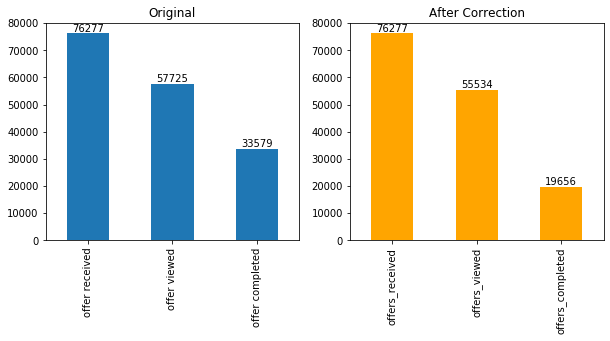

In [10]:
plt.figure(figsize=(10, 4));
plt.title("Frequency of each Event");

plt.subplot(1,2,1)
transcript.event.value_counts()[1:].plot.bar();
plt.title("Original")
for i, event_num in enumerate(transcript.event.value_counts()[1:]):
    #X position just after the end of the bar:
    plt.text(i, event_num, event_num, ha = 'center', va = 'bottom');
    
plt.subplot(1,2,2)
frequency = customers[['offers_received','offers_viewed', 'offers_completed']].sum().astype(int)
frequency.plot.bar(color='orange');
plt.title("After Correction");
for i, event_num in enumerate(frequency):
    #X position just after the end of the bar:
    plt.text(i, event_num, event_num, ha = 'center', va = 'bottom');

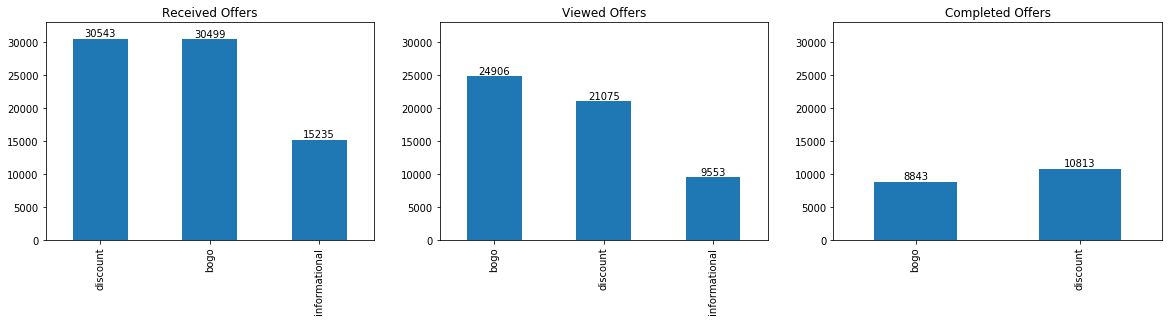

In [11]:
plt.subplots(figsize=(20, 4));

plt.subplot(1,3,1)
received_by_offer_type = offers['offer_type'].value_counts()
received_by_offer_type.plot.bar();
plt.title("Received Offers");
for i, event_num in enumerate(received_by_offer_type):
    #X position just after the end of the bar:
    plt.text(i, event_num, event_num, ha = 'center', va = 'bottom');
plt.ylim(0, 33000);

plt.subplot(1,3,2)
viewed_by_offer_type = offers[offers.viewed_on_time == 1].groupby('offer_type').viewed_on_time.count()
viewed_by_offer_type.plot.bar();
plt.title("Viewed Offers");
for i, event_num in enumerate(viewed_by_offer_type):
    #X position just after the end of the bar:
    plt.text(i, event_num, event_num, ha = 'center', va = 'bottom');
plt.xlabel("");
plt.ylim(0, 33000);

plt.subplot(1,3,3)
completed_by_offer_type = offers[offers.completed_after_viewing == 1].groupby('offer_type').completed_after_viewing.count()
completed_by_offer_type.plot.bar();
plt.title("Completed Offers");
for i, event_num in enumerate(completed_by_offer_type):
    #X position just after the end of the bar:
    plt.text(i, event_num, event_num, ha = 'center', va = 'bottom');
plt.xlabel("");
plt.ylim(0, 33000);

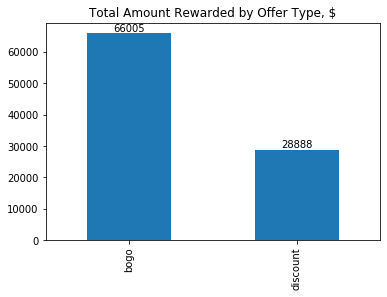

In [12]:
rewards = offers[offers.completed_after_viewing == 1].groupby(['offer_type'])['reward'].sum()
plt.title("Total Amount Rewarded by Offer Type, $");
rewards.plot.bar();
for i, event_num in enumerate(rewards):
    #X position just after the end of the bar:
    plt.text(i, event_num, event_num, ha = 'center', va = 'bottom');
plt.xlabel("");

# Customers Engagement with Offers - RR and CVR

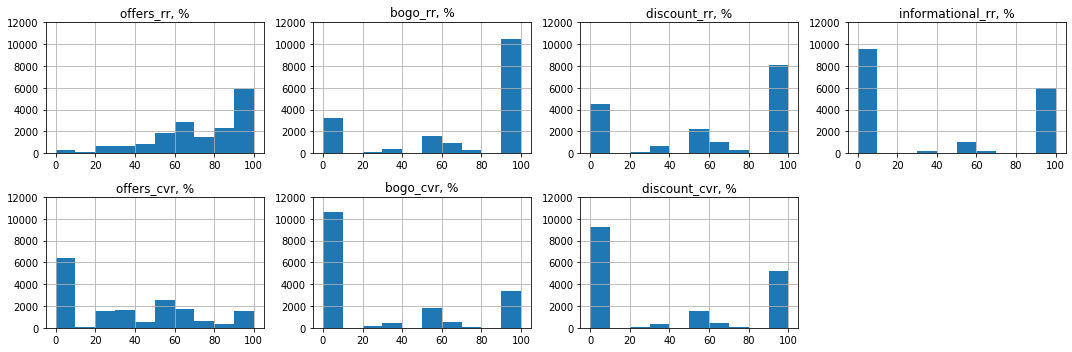

In [13]:
cols = ['offers_rr', 'bogo_rr', 'discount_rr', 'informational_rr', 'offers_cvr', 'bogo_cvr', 'discount_cvr',]
plt.figure(figsize=(15, 5));

for i, each in enumerate(customers[cols]):
    plt.subplot(2,4,i+1)
    customers[each].hist();
    plt.title(f"{each}, %");
    plt.ylim(0, 12000);
    plt.tight_layout();

Note: people view offers much more often than complete. Bogos viewed ofter than discounts or informational. However, customers complete discount offers more often than bogos.

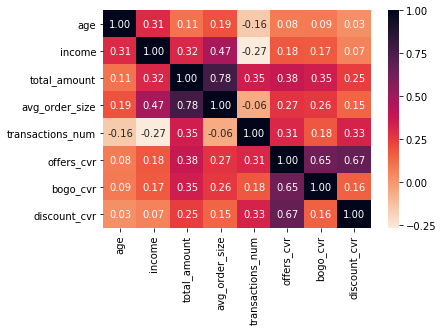

In [14]:
cols = ['became_member_on', 'age', 'income', 'total_amount', 'avg_order_size', 'transactions_num', 'offers_cvr', 'bogo_cvr', 'discount_cvr']
sns.heatmap(customers[cols].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

Note: not profile, but spending habits (like number of transactions and total amount) seem to correlate more with the conversion rates

### Viewing Rate

In [15]:
# total viewing rate - % customers who viewed the offers on time
viewing_rate = (customers.offers_viewed > 0).sum()
print(f"{viewing_rate/customers.shape[0]*100:.1f}% of customers viewed offers on time")

98.4% of customers viewed offers on time


### Rewarded Rate

In [16]:
# total rewarded rate - % customers who completed the offers 
rewarded_rate = (customers.offers_completed > 0).sum()
print(f"{rewarded_rate/customers.shape[0]*100:.1f}% of customers completed offers after viewing")

62.6% of customers completed offers after viewing


## Revenue, Campaign Cost

In [17]:
def normalize_json_in_transcript_dataset(transcript):
    '''
    Input:
        transcript: original transcript dataset 
    Output:
        transcript_clean: normalized transcript dataset
    '''    
    # normalize json in value column
    value_normalized = json_normalize(transcript['value'])
    # merging the two columns 'offer id' and 'offer_id' into new one 'id'
    value_normalized['id'] = value_normalized['offer id'].fillna(value_normalized['offer_id'])
    # dropping the redundant columns 'offer id', 'offer_id'
    value_normalized = value_normalized.drop(['offer id', 'offer_id'], axis=1)
    #rename the column 'reward' to 'rewarded'
    value_normalized.rename(columns={value_normalized.columns[1]:'rewarded'}, inplace=True)
    # join value_normalized with transcript 
    transcript_clean = transcript.join(value_normalized)    
    # dropping 'value', 'event' columns
    transcript_clean = transcript_clean.drop(['value'], axis=1)
    
    return transcript_clean

In [18]:
transcript_clean = normalize_json_in_transcript_dataset(transcript)

In [19]:
revenue = customers.total_amount.sum()
print(f"total revenue during test period - ${revenue:.2f}")
true_campaign_cost = customers.total_rewarded.sum()
actual_campaign_cost = transcript_clean.rewarded.sum()
print(f"campaign cost based on true customer behavior - ${true_campaign_cost}")
print(f"actual campaign cost - ${actual_campaign_cost}")

total revenue during test period - $1775451.97
campaign cost based on true customer behavior - $94893.0
actual campaign cost - $164676.0


Cost per Acquisition (CPA) -  "also known as cost per order or lead – tells you how much each new customer cost to obtain."

In [20]:
# campaign cost per transaction
actual_cost_per_acquisition = actual_campaign_cost/customers.transactions_num.sum()
true_cost_per_acquisition = true_campaign_cost/customers.transactions_num.sum()
print(f"actual cost per acquisition - ${actual_cost_per_acquisition:.2f}")
print(f"cost per acquisition based on true customer behavior - ${true_cost_per_acquisition:.2f}")

actual cost per acquisition - $1.19
cost per acquisition based on true customer behavior - $0.68


Average Order Size 

In [21]:
# revenue per transaction
average_order_size = revenue/customers.transactions_num.sum()
print(f"average order size - ${average_order_size:.2f}")

average order size - $12.78


Revenue per Order - how much profit the company made from each order on average

In [22]:
actual_revenue_per_order = average_order_size-actual_cost_per_acquisition
true_revenue_per_order = average_order_size-true_cost_per_acquisition
print(f"actual revenue per order - ${actual_revenue_per_order:.2f}")
print(f"true revenue per order - ${true_revenue_per_order:.2f}")

actual revenue per order - $11.59
true revenue per order - $12.09


Return on Investment (ROI), %

In [23]:
actual_roi = (revenue-actual_campaign_cost)/actual_campaign_cost * 100
true_roi = (revenue-true_campaign_cost)/true_campaign_cost * 100
print(f"actual ROI - {actual_roi:.0f}%")
print(f"correct ROI - {true_roi:.0f}%")

actual ROI - 978%
correct ROI - 1771%
